<a href="https://colab.research.google.com/github/wvirany/mini_projects/blob/main/double_descent/knn_bias_variance_tradeoff.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [361]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split
from sklearn.metrics import zero_one_loss as loss

In [362]:
cm = plt.cm.RdBu
cm_bright = ListedColormap(["tomato", "#0000FF"])

In [363]:
num_samples = 1000
p = .8

#### Pure noise dataset:

In [364]:
X1 = np.random.random_sample(size=num_samples)
X2 = np.random.random_sample(size=num_samples)

X = np.stack((X1, X2), axis=1)
y = np.random.binomial(n=1, p=p, size=num_samples)

pure_noise_dataset = (X, y)

#### Some noise dataset:

In [365]:
X1 = np.random.random_sample(size=num_samples)
X2 = np.random.random_sample(size=num_samples)
X = np.stack((X1, X2), axis=1)

y = np.zeros(num_samples)

for i, sample in enumerate(X):

  if (sample[0] - .5)**2 + (sample[1] - .5)**2 < .1:
    y[i] = np.random.binomial(n=1, p=1-p)

  else:
    y[i] = np.random.binomial(n=1, p=p)

noisy_signal_dataset = (X,y)

#### Pure signal dataset:

In [366]:
X1 = np.random.random_sample(size=num_samples)
X2 = np.random.random_sample(size=num_samples)
X = np.stack((X1, X2), axis=1)

y = np.zeros(num_samples)

for i, sample in enumerate(X):

  if (sample[0] - .5)**2 + (sample[1] - .5)**2 < .1:
    y[i] = 0

  else:
    y[i] = 1

pure_signal_dataset = (X, y)

## Classification

In [367]:
datasets = [
    pure_noise_dataset,
    noisy_signal_dataset,
    pure_signal_dataset
]

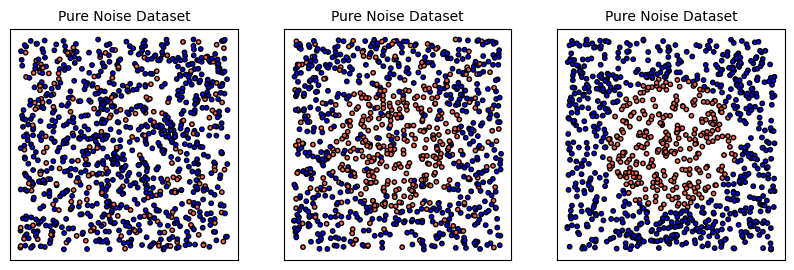

In [368]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 3))

for i, j in enumerate(datasets):

  X, y = j

  axes[i].scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright, ec='k', s=10)
  axes[i].set_title('Pure Noise Dataset', fontsize=10)

# X, y = pure_noise_dataset

# axes[0].scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright, ec='k', s=10)
# axes[0].set_title('Pure Noise Dataset', fontsize=10)

# X, y = noisy_signal_dataset

# axes[1].scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright, ec='k', s=10)
# axes[1].set_title('Noisy Signal Dataset', fontsize=10)

# X, y = pure_signal_dataset

# axes[2].scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright, ec='k', s=10)
# axes[2].set_title('Pure Signal Dataset', fontsize=10)

# Removing axis ticks
tick_params = {
    'axis': 'both',
    'which': 'both',
    'left': False,
    'bottom': False,
    'labelbottom': False,
    'labelleft': False
}

[axes[i].tick_params(**tick_params) for i in range(3)];

In [369]:
X, y = datasets[1]
noise = 1

clf = KNN(5)
clf.fit(X, y);

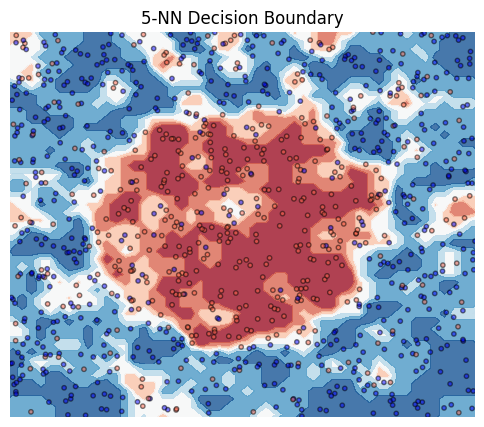

In [370]:
fig, ax = plt.subplots(figsize=(6,5))

DecisionBoundaryDisplay.from_estimator(clf, X, cmap=cm, alpha=.8, ax=ax, eps=.5)

ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright, ec='k', alpha=.5, s=10)

ax.set_title('5-NN Decision Boundary')
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.axis('off');

In [371]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.8, random_state=42, stratify=y)

num_train = X_train.shape[0]

In [372]:
train_loss = []
test_loss = []
scale = []

for i in range(1, num_train):

  scale.append(1 / i)

  clf = KNN(i)
  clf.fit(X_train, y_train)

  train_pred = clf.predict(X_train)
  test_pred = clf.predict(X_test)

  train_loss.append(loss(y_train, train_pred))
  test_loss.append(loss(y_test, test_pred))

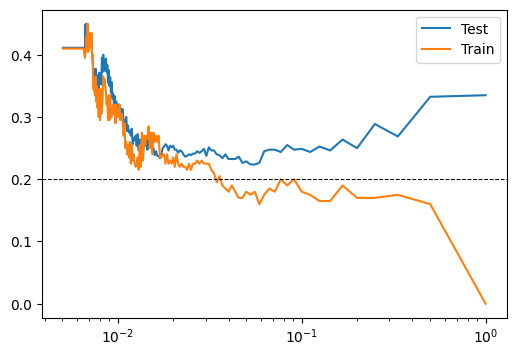

In [373]:
fig, ax = plt.subplots(figsize=(6,4))

# scale = np.log(scale)

ax.plot(scale, test_loss, label='Test')
ax.plot(scale, train_loss, label='Train')

if noise:
  ax.axhline(1-p, ls='dashed', c='k', lw=.75)

plt.xscale('log')

# ax.set_xlim(0, 1)
# ax.set_ylim(0, 1)
ax.legend();